# Q2

# Q2 a)

# Implementing and testing 2D FFT

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
image = cv2.imread("lena.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape

(440, 440)

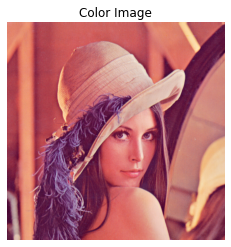

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.title('Color Image')
plt.show()

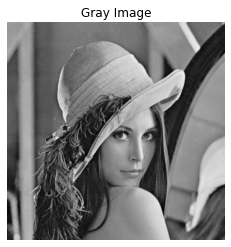

In [4]:
plt.imshow(gray_image, cmap = "gray")
plt.axis('off')
plt.title('Gray Image')
plt.show()

# scaling down the pixel values in the lena image to the range - [0,1]

In [5]:
def scaling_image(input_image):
    
    scaled_input_image = np.zeros((input_image.shape[0],input_image.shape[1]),dtype = 'float32')

    for row in range(input_image.shape[0]):

        for col in range(input_image.shape[1]):

            scaled_input_image[row,col] = input_image[row,col].astype('float32')/255.
            
    return scaled_input_image 

In [6]:
scaled_image = scaling_image(gray_image)
scaled_image

array([[0.63529414, 0.63529414, 0.6313726 , ..., 0.6745098 , 0.627451  ,
        0.5137255 ],
       [0.63529414, 0.63529414, 0.6313726 , ..., 0.6745098 , 0.627451  ,
        0.5137255 ],
       [0.63529414, 0.63529414, 0.6313726 , ..., 0.67058825, 0.61960787,
        0.50980395],
       ...,
       [0.16862746, 0.1764706 , 0.19215687, ..., 0.40784314, 0.39607844,
        0.38039216],
       [0.16862746, 0.18431373, 0.20392157, ..., 0.4       , 0.40784314,
        0.4117647 ],
       [0.17254902, 0.18431373, 0.21176471, ..., 0.39607844, 0.4117647 ,
        0.42352942]], dtype=float32)

In [7]:
gray_image

array([[162, 162, 161, ..., 172, 160, 131],
       [162, 162, 161, ..., 172, 160, 131],
       [162, 162, 161, ..., 171, 158, 130],
       ...,
       [ 43,  45,  49, ..., 104, 101,  97],
       [ 43,  47,  52, ..., 102, 104, 105],
       [ 44,  47,  54, ..., 101, 105, 108]], dtype=uint8)

# DFT2 function

In [8]:
def DFT2(input_image):
    fft1_image = np.zeros((input_image.shape[0], input_image.shape[1]), dtype = 'complex')
    fft2_image = np.zeros((input_image.shape[0], input_image.shape[1]), dtype = 'complex')
    for row in range(input_image.shape[0]):
        
        fft1_image[row, : ] = np.fft.fft(input_image[row ,: ])
        
    for col in range(fft1_image.shape[1]):
        
        fft2_image[:, col] = np.fft.fft(fft1_image[:, col])
        
    return fft2_image

In [9]:
# scaled_image(passed in the dft2 function below) is the scaled down image of the gray lena image
f = DFT2(scaled_image)
f

array([[ 9.41791595e+04   +0.j        , -1.32605217e+03+6928.26008459j,
         4.45443677e+03-3279.87446605j, ...,
        -6.91412729e+02-1838.48699722j,  4.45443677e+03+3279.87446605j,
        -1.32605217e+03-6928.26008459j],
       [-8.37846430e+01-3545.76435384j, -4.60583848e+03+4606.16030199j,
        -3.20398722e+03 +217.75357611j, ...,
         1.89208271e+03+2351.68299707j, -1.02786249e+03+1296.80102976j,
         1.02025131e+02+2741.4323825j ],
       [-1.30229192e+03 -475.37879051j, -7.95709409e+02 -387.10940328j,
         1.93767512e+03-1311.96666989j, ...,
         1.02391899e+03+2684.36743376j, -2.09555156e+03 -509.04877382j,
         2.37833145e+03 -182.71618199j],
       ...,
       [ 1.49437918e+03 -627.39367783j,  2.13376237e+03+2046.8179341j ,
        -1.52536299e+03 -580.14642037j, ...,
         2.87895939e+03 +316.70306245j,  3.76828573e+02-1965.96863635j,
        -1.56015196e+02+1749.10240541j],
       [-1.30229192e+03 +475.37879051j,  2.37833145e+03 +182.7161819

# Spectrum of the image

In [10]:
def spectrum(input_image):
    result = np.sqrt(np.real(input_image)**2+np.imag(input_image)**2)
    return result

In [11]:
spectrum_lena = spectrum(f)
spectrum_lena

array([[94179.15949942,  7054.02028248,  5531.68902172, ...,
         1964.20111018,  5531.68902172,  7054.02028248],
       [ 3546.75411036,  6513.86681256,  3211.37832252, ...,
         3018.34224132,  1654.74898476,  2743.33020891],
       [ 1386.34384168,   884.87691467,  2340.05157947, ...,
         2873.01907695,  2156.4941446 ,  2385.33974633],
       ...,
       [ 1620.73809423,  2956.75590758,  1631.96266168, ...,
         2896.32663543,  2001.75734113,  1756.04668675],
       [ 1386.34384168,  2385.33974633,  2156.4941446 , ...,
         2647.7959258 ,  2340.05157947,   884.87691467],
       [ 3546.75411036,  2743.33020891,  1654.74898476, ...,
         5705.2608703 ,  3211.37832252,  6513.86681256]])

In [12]:
s = np.log(1+abs(f))
s

array([[11.45296482,  8.86149474,  8.61842924, ...,  7.58334987,
         8.61842924,  8.86149474],
       [ 8.17407004,  8.78184205,  8.07476685, ...,  8.01279429,
         7.41200874,  7.91729232],
       [ 7.23514629,  6.78657802,  7.7583555 , ...,  7.9634667 ,
         7.67670271,  7.77751598],
       ...,
       [ 7.39125375,  7.99218612,  7.39815123, ...,  7.97154374,
         7.60228018,  7.47138966],
       [ 7.23514629,  7.77751598,  7.67670271, ...,  7.88186045,
         7.7583555 ,  6.78657802],
       [ 8.17407004,  7.91729232,  7.41200874, ...,  8.64931925,
         8.07476685,  8.78184205]])

# Ploting the spectrum

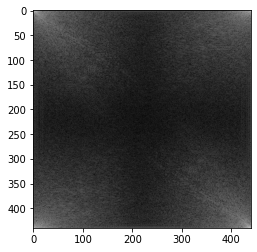

In [13]:
plt.imshow(s, cmap = 'gray')
plt.show()

# Visualizing the shifted spectrum

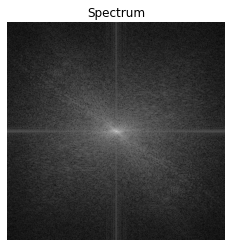

True

In [14]:
s_shifted = np.fft.fftshift(f)
s_shifted = np.log(1+abs(s_shifted))

plt.imshow(s_shifted, cmap = 'gray')
plt.title('Spectrum')
plt.axis('off')
plt.show()
cv2.imwrite('Spectrum.png', s_shifted)

# Calculating the phase angle

In [15]:
angle = np.arctan2(np.imag(f),np.real(f))
angle

array([[ 0.        ,  1.75990681, -0.63468588, ..., -1.93051091,
         0.63468588, -1.75990681],
       [-1.59442143,  2.35615956,  3.0737337 , ...,  0.89327781,
         2.24101728,  1.5335975 ],
       [-2.79158918, -2.68880653, -0.59517921, ...,  1.20639361,
        -2.90328972, -0.07667475],
       ...,
       [-0.39748829,  0.76460394, -2.77815439, ...,  0.10956554,
        -1.38141749,  1.65975818],
       [ 2.79158918,  0.07667475,  2.90328972, ..., -2.17347289,
         0.59517921,  2.68880653],
       [ 1.59442143, -1.5335975 , -2.24101728, ...,  1.83355257,
        -3.0737337 , -2.35615956]])

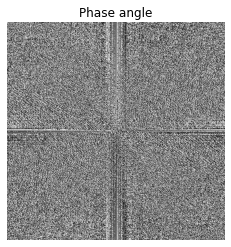

True

In [16]:
angle = np.fft.fftshift(angle)
plt.imshow(angle, cmap = 'gray')
plt.axis('off')
plt.title('Phase angle')
plt.show()
cv2.imwrite('phase_angle.png', angle)

# Q2 b)

# IDFT2 function

In [17]:
def IDFT2(dft2_image):
    swapped = np.imag(dft2_image) + complex('j') * np.real(dft2_image)
    swapped_dft2_image = DFT2(swapped)
    idft2_image = np.imag(swapped_dft2_image) + complex('j') * np.real(swapped_dft2_image)
    
    return idft2_image/(idft2_image.shape[0]*idft2_image.shape[1])

In [18]:
g = IDFT2(f)
g
g_real = np.real(g)

In [19]:
np.imag(g)

array([[-1.40468696e-17,  1.82816020e-17,  3.26409906e-17, ...,
        -1.96882383e-17, -1.66316024e-17, -6.37847972e-18],
       [-5.31418559e-18,  3.86877384e-18, -6.78568986e-18, ...,
        -3.37361671e-17, -4.02593538e-17, -3.19379713e-17],
       [-3.23976634e-17,  1.13817035e-17, -1.49609685e-17, ...,
        -8.48702578e-17, -2.75686755e-17,  2.25423713e-17],
       ...,
       [-3.00014228e-17, -1.65967360e-17, -4.16570256e-17, ...,
        -5.75406449e-17, -3.94259719e-17, -1.29446169e-17],
       [-7.50018658e-17, -3.13495481e-17, -4.42679008e-18, ...,
         1.14749351e-17, -3.14773350e-17, -1.75458419e-17],
       [-5.34013569e-17, -4.81203418e-17, -9.69945350e-18, ...,
         3.76586897e-17, -8.79412950e-18, -9.47196273e-18]])

In [20]:
d = scaled_image - g_real
d

array([[ 0.00000000e+00, -1.11022302e-16, -1.11022302e-16, ...,
        -1.11022302e-16, -2.22044605e-16, -2.22044605e-16],
       [ 2.22044605e-16,  0.00000000e+00,  0.00000000e+00, ...,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.55111512e-17, -1.66533454e-16, -2.77555756e-17, ...,
        -1.66533454e-16, -5.55111512e-17, -1.11022302e-16],
       [-5.55111512e-17, -5.55111512e-17, -2.77555756e-17, ...,
        -1.66533454e-16, -1.66533454e-16, -2.77555756e-16],
       [ 0.00000000e+00, -8.32667268e-17, -2.77555756e-17, ...,
        -1.66533454e-16, -5.55111512e-17, -5.55111512e-17]])

In [21]:
g_real

array([[0.63529414, 0.63529414, 0.63137257, ..., 0.67450982, 0.627451  ,
        0.51372552],
       [0.63529414, 0.63529414, 0.63137257, ..., 0.67450982, 0.627451  ,
        0.51372552],
       [0.63529414, 0.63529414, 0.63137257, ..., 0.67058825, 0.61960787,
        0.50980395],
       ...,
       [0.16862746, 0.17647059, 0.19215687, ..., 0.40784314, 0.39607844,
        0.38039216],
       [0.16862746, 0.18431373, 0.20392157, ..., 0.40000001, 0.40784314,
        0.41176471],
       [0.17254902, 0.18431373, 0.21176471, ..., 0.39607844, 0.41176471,
        0.42352942]])

In [22]:
d2 = gray_image - (g_real * 255).astype(np.uint8)

In [23]:
d2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Plot of the difference between the original image and the inverse fourier transformed image

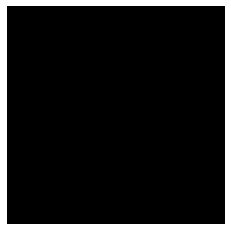

In [24]:
plt.imshow(d2, cmap = "gray")
plt.axis('off')
plt.show()

In [25]:
# got a black image which means there is no difference